### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [6]:
%config Completer.use_jedi = False
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [61]:
data = pd.read_csv('data/coupons.csv')

In [62]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [63]:
print(data.isnull().sum())
original=data.copy()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [88]:
#the only columns with missing values that we will be using are Bar and RestaurantLessThan20 so we drop rows with missing values in those columns.


data=data.dropna(subset=['Bar','RestaurantLessThan20'])

4. What proportion of the total observations chose to accept the coupon? 



In [89]:
(data.Y==1).sum()/data.shape[0]

0.5680999279365841

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:>

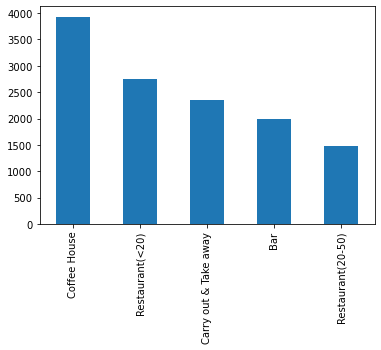

In [90]:
data.coupon.value_counts().plot.bar()

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

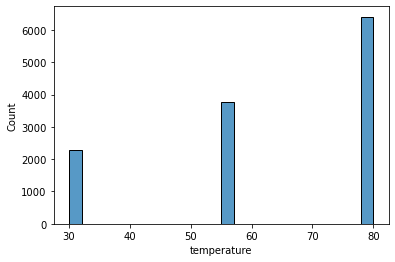

In [91]:
sns.histplot(data=data, x="temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [92]:
bar_data=data.query('coupon == "Bar"')


2. What proportion of bar coupons were accepted?


In [93]:
bar_data.Y.sum()/bar_data.shape[0]

0.40968718466195764

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [94]:
bar_data.Bar.value_counts()

less3=["never","less1","1~3"]
more3=["4~8","gt8"]

less_bar=bar_data.query('Bar in @less3')
more_bar=bar_data.query('Bar in @more3')

lesser_bar=less_bar.Y.sum()/less_bar.shape[0]# acceptance rate for those who go to a bar <=3
more_bar=more_bar.Y.sum()/more_bar.shape[0] #acceptance rate for those who go to a bar >3

print("Less, More, respectively:", lesser_bar, more_bar)

Less, More, respectively: 0.36960179472798654 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [95]:
over_25=list(bar_data.age.unique())
over_25.remove('below21')
over_25.remove('21')

more_1=["1~3","4~8","gt8"]

bar_data_4=bar_data.query('Bar in @more_1 and age in @over_25')

accept_4=bar_data_4.Y.sum()/bar_data_4.shape[0]

print("acceptance rate for the above conditions is: ", accept_4)


acceptance rate for the above conditions is:  0.6952380952380952


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [96]:
#print(bar_data.occupation.value_counts())
#print(bar_data.passanger.value_counts())
bar_data_5=bar_data.query('Bar in @more_1 and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')

accept_5=bar_data_5.Y.sum()/bar_data_5.shape[0]

print("acceptance rate for the above conditions is: ", accept_5)

acceptance rate for the above conditions is:  0.7132486388384754


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [101]:


bar_data_6_1=bar_data.query('Bar in @more_1 and passanger != "Kid(s)" and maritalStatus != "Widowed"')

accept_6_1=bar_data_6_1.Y.sum()/bar_data_6_1.shape[0]

print("The acceptance rate with the first of the above conditions is:", accept_6_1)

under30=['below21','21','26']

bar_data_6_2=bar_data.query('Bar in @more_1 and age in @under30')

accept_6_2=bar_data_6_2.Y.sum()/bar_data_6_2.shape[0]

print("The acceptance rate with the second of the above conditions is:", accept_6_2)

rest_less4=['1~3','never']
income_less50=['Less than $12500','$37500 - $49999','$12500 - $24999','$25000 - $37499']

bar_data_6_3=bar_data.query('RestaurantLessThan20 not in @rest_less4 and income in @income_less50')

accept_6_3=bar_data_6_3.Y.sum()/bar_data_6_3.shape[0]

print("The acceptance rate with the third of the above conditions is:", accept_6_3)


The acceptance rate with the first of the above conditions is: 0.7132486388384754
The acceptance rate with the second of the above conditions is: 0.7217391304347827
The acceptance rate with the third of the above conditions is: 0.42829457364341084


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [100]:
data.income.value_counts()

$25000 - $37499     1985
$12500 - $24999     1831
$37500 - $49999     1755
$100000 or More     1736
$50000 - $62499     1609
Less than $12500    1014
$87500 - $99999      883
$62500 - $74999      840
$75000 - $87499      836
Name: income, dtype: int64

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [102]:
def accept_rate(table):
    return(table.Y.sum()/table.shape[0])

data2=data.dropna(subset=['CoffeeHouse'])#we will consider Coffee House coupons so we drop rows with missing data.
coffee_data=data2.query('coupon == "Coffee House"')

Text(0.5, 1.0, 'Acceptance Rate of Coffee House Coupons by Time of Day')

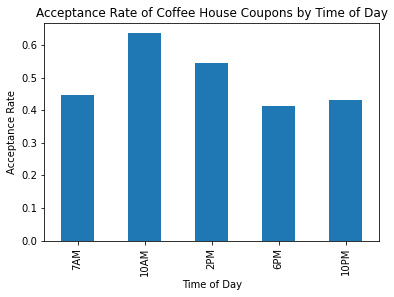

In [128]:
#We examine acceptance of coupons by time of day.
coffee_data.groupby('time').apply(accept_rate)[['7AM','10AM','2PM','6PM','10PM']].plot.bar()
plt.xlabel("Time of Day")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate of Coffee House Coupons by Time of Day")



Text(0.5, 1.0, 'Acceptance Rate by Age of Driver')

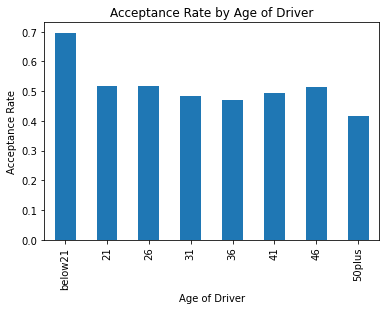

In [155]:
coffee_data.groupby('age').apply(accept_rate)[['below21','21','26','31','36','41','46','50plus']].plot.bar()
plt.xlabel("Age of Driver")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate by Age of Driver")

Text(0.5, 1.0, 'Acceptance Rate By Driver Destination')

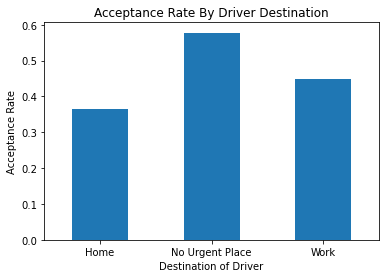

In [145]:

coffee_data.groupby('destination').apply(accept_rate).plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Destination of Driver")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate By Driver Destination")


The above plots show that three important factors in determining acceptance rate of Coffee House coupons are the age of the driver, destination, and time of day. With this in mind it would make sense to target drivers with no important place who are under the age of 21 at 10AM.




In [157]:
rate=accept_rate(coffee_data.query('age == "below21" and destination == "No Urgent Place" and time == "10AM"'))

print("The acceptance rate for drivers meeting the above conditions is : ", rate)




The acceptance rate for drivers meeting the above conditions is :  0.7428571428571429


array(['No Urgent Place', 'Home', 'Work'], dtype=object)